# **Project Description:**

**Definition:** In a work environment, Employee Attrition describes an unanticipated attrition of the workforce. The causes of this decline are all unavoidable reasons such as retirement, resignation, employee loss of work capacity or sudden death. Companies with high workforce attrition rates often face the risk of abusing internal resources.rganization’s goals and strategies.

**Purpose:** This project selects this topic and dataset for the purpose of :

Discover the factors that affect employee attrition and then take measures to reduce this rate.
Build a machine learning model based on employee factors to predict whether that employee is likely to attrition or not?


# **All the Necessary Imports and Installations**

In [90]:
!pip install imbalanced-learn
!pip install delayed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")

# **Reading the Dataset**

In [91]:
data=pd.read_csv('/content/train.csv')

# **Checking the data**

In [92]:
data.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


**All the datatypes in the Dataset**

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

# **Inspiration:**

*   There are 28 columns and 1628 rows. This means we have 27 features, 1 target to investigate, and 1628 different person's information.
*   The target is binary.

*   Out of the 27 available features, 7 of them are in the form of objects and the rest are in the form of numbers.


**Checking null values in the data**

In [94]:
data.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [95]:
cat = data.select_dtypes(['object']).columns
num = data.select_dtypes(['number']).columns
print(cat)
print(num)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
Index(['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'CommunicationSkill', 'Behaviour'],
      dtype='object')


In [96]:
for i in cat:
    print('Unique values of ', i, set(data[i]))

Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
Unique values of  Department {'Research & Development', 'Human Resources', 'Sales'}
Unique values of  EducationField {'Other', 'Life Sciences', 'Marketing', 'Medical', 'Human Resources', 'Technical Degree'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  JobRole {'Laboratory Technician', 'Manufacturing Director', 'Human Resources', 'Sales Executive', 'Healthcare Representative', 'Research Director', 'Manager', 'Research Scientist', 'Sales Representative'}
Unique values of  MaritalStatus {'Married', 'Divorced', 'Single'}
Unique values of  OverTime {'Yes', 'No'}


**Dropping Irrelevant Columns**

In [97]:
data = data.drop(['Behaviour','EmployeeNumber'],axis=1)

# **Summary Statistics of numeric variables**

In [98]:
data.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
Id,1628.0,814.500000,470.107435,1.0,407.75,814.5,1221.25,1628.0
Age,1628.0,35.645577,9.481794,18.0,29.00,34.0,42.00,60.0
Attrition,1628.0,0.482187,0.499836,0.0,0.00,0.0,1.00,1.0
DistanceFromHome,1628.0,9.735258,8.306546,1.0,2.00,8.0,15.00,29.0
Education,1628.0,2.884521,1.020470,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1628.0,2.646192,1.125283,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1628.0,2.650491,0.736330,1.0,2.00,3.0,3.00,4.0
JobSatisfaction,1628.0,2.639435,1.096272,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1628.0,5785.524570,4339.293147,1009.0,2625.00,4304.0,7124.25,19999.0
NumCompaniesWorked,1628.0,2.761671,2.549995,0.0,1.00,2.0,4.00,9.0


# **Summary Statistics of categorical variables**

In [99]:
cat_cols=data.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data.select_dtypes(include=object).describe())
display(cat_df)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1628,1628,1628,1628,1628,1628,1628
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1105,979,623,996,365,681,1000


count
column         value                           
BusinessTravel Non-Travel                   120
               Travel_Frequently            403
               Travel_Rarely               1105
Department     Human Resources               81
               Sales                        568
               Research & Development       979
EducationField Human Resources               40
               Other                         85
               Technical Degree             162
               Marketing                    197
               Medical                      521
               Life Sciences                623
Gender         Female                       632
               Male                         996
JobRole        Research Director             47
               Human Resources               72
               Manager                       90
               Healthcare Representative    110
               Manufacturing Director       121
               Sales Representative         172
               Laboratory Technician        310
               Research Scientist           341
               Sales Executive              365
MaritalStatus  Divorced                     317
               Single                       630
               Married                      681
OverTime       Yes                          628
               No                          1000

# **Analysis**

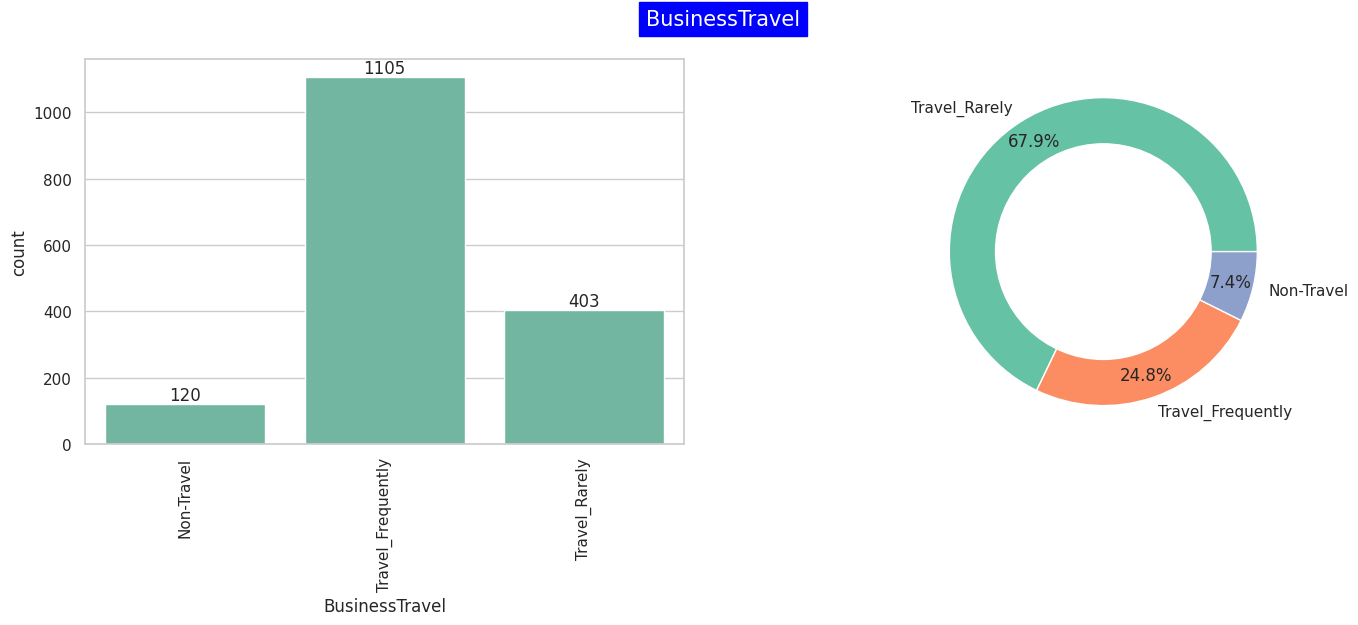

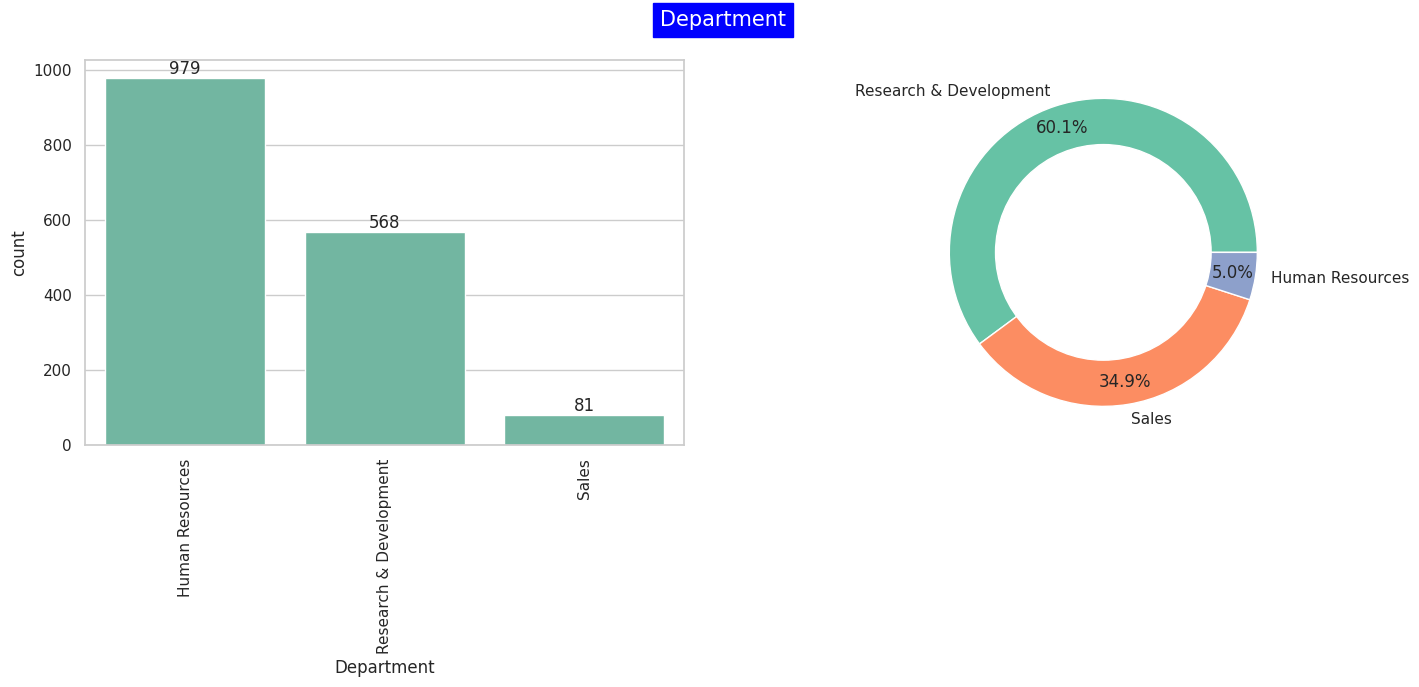

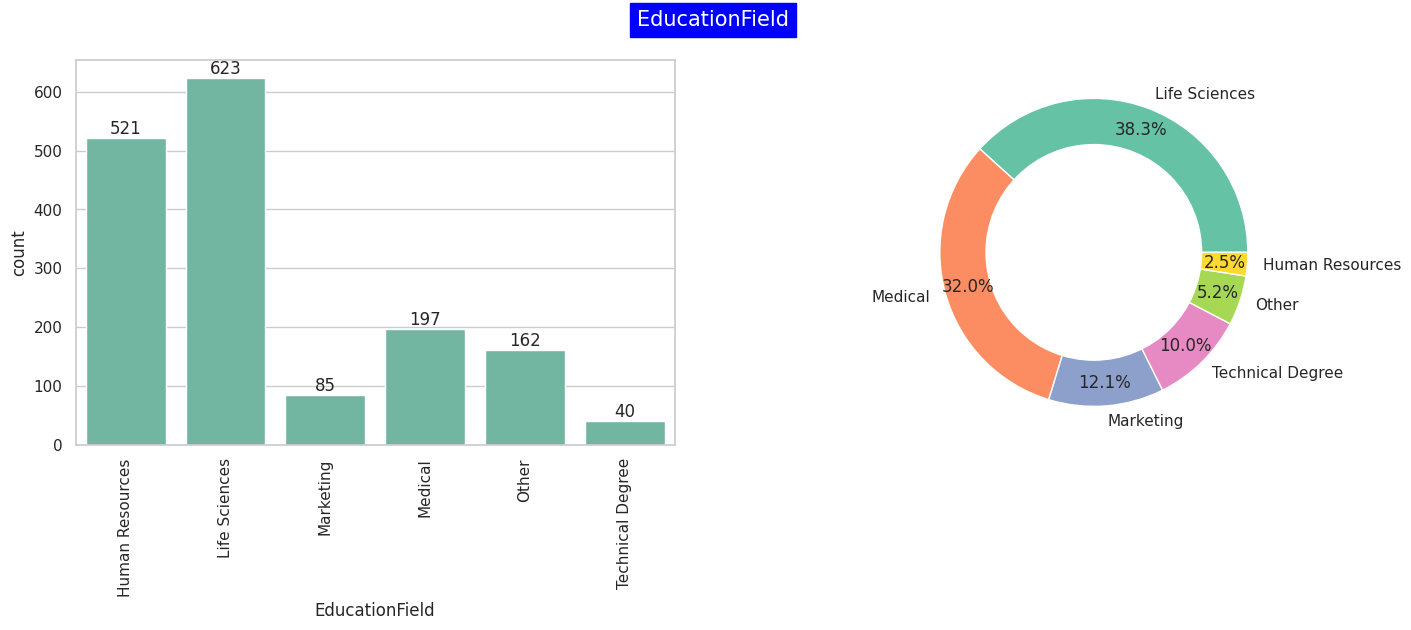

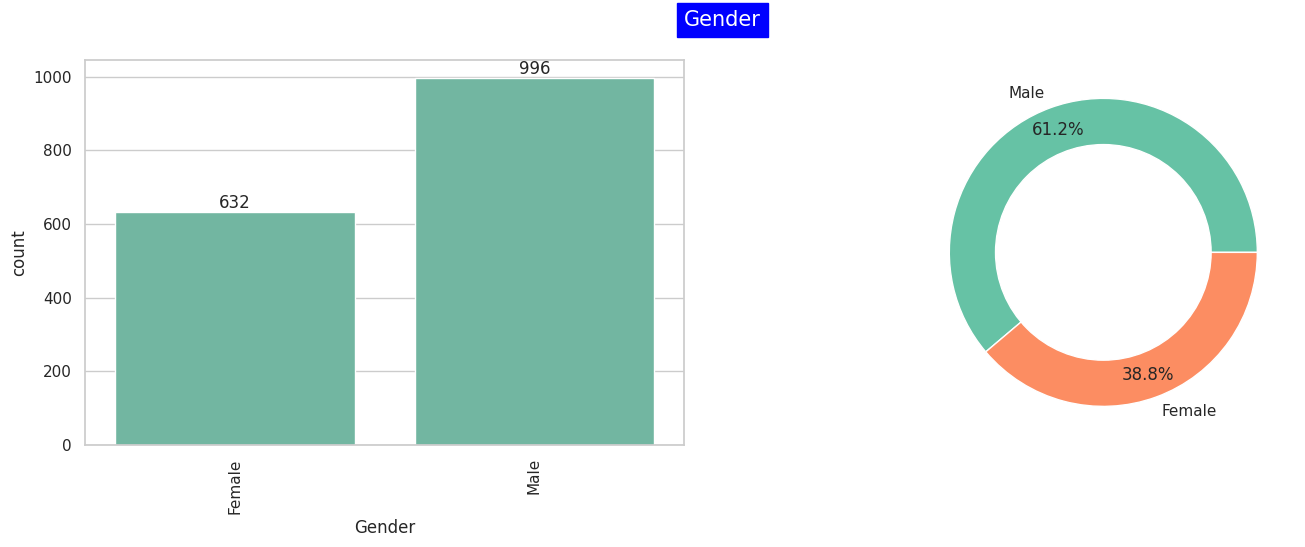

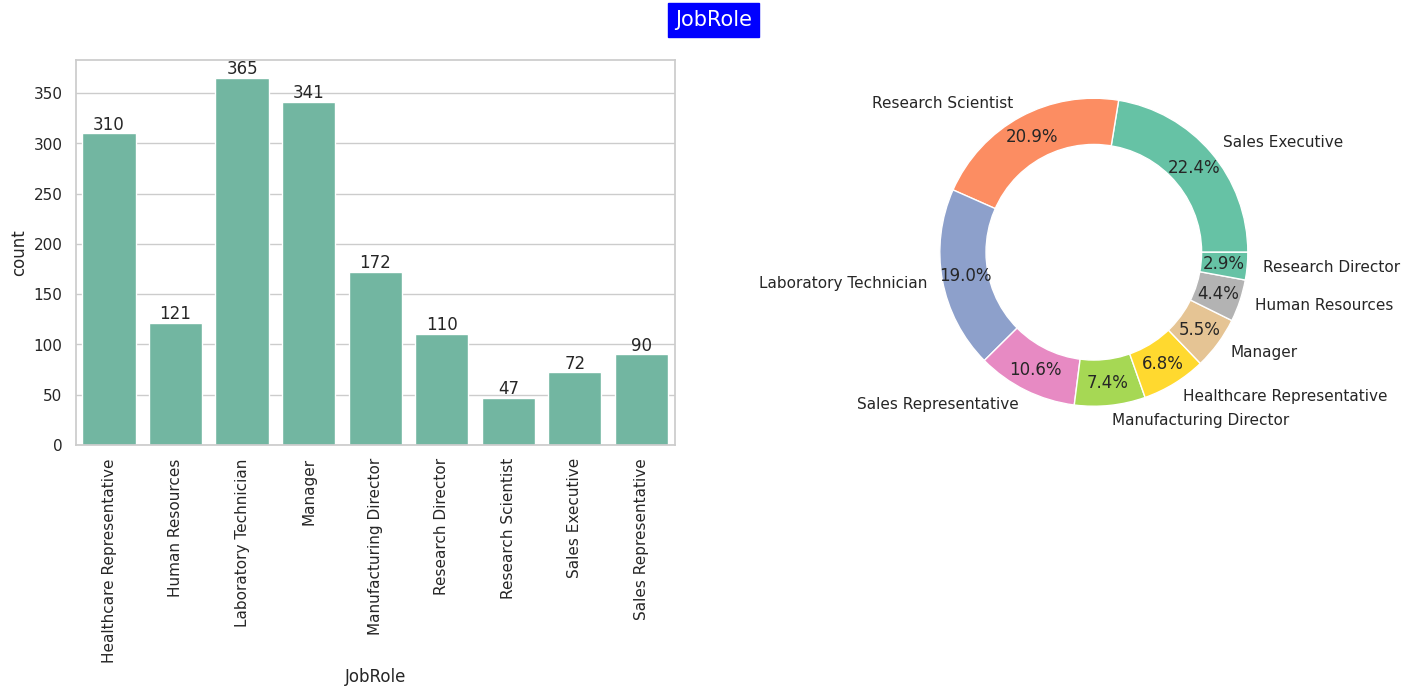

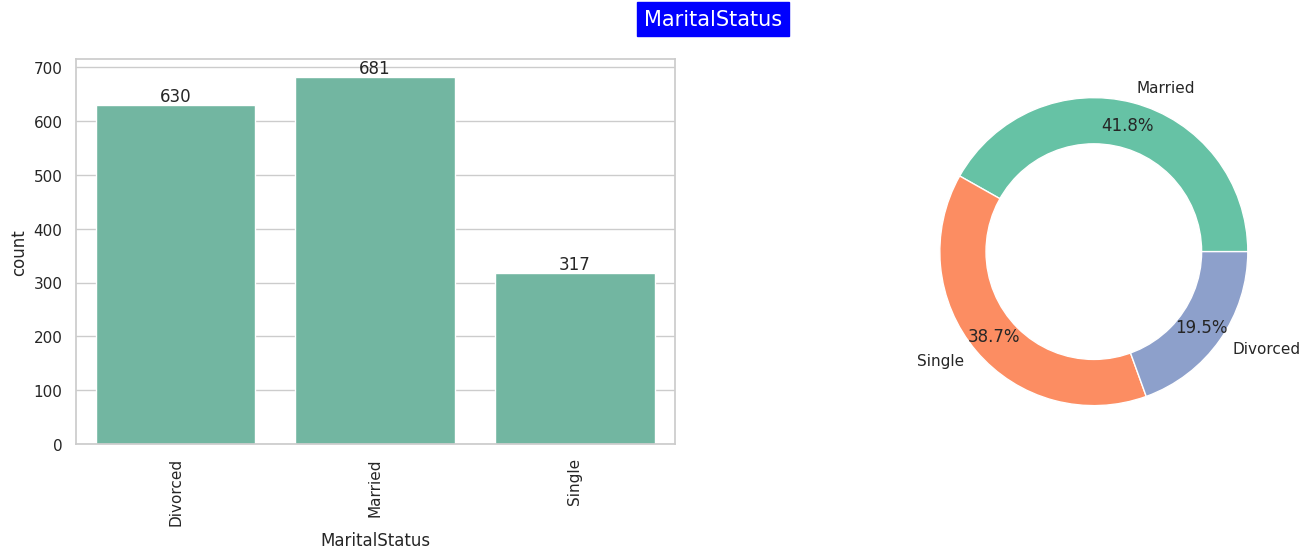

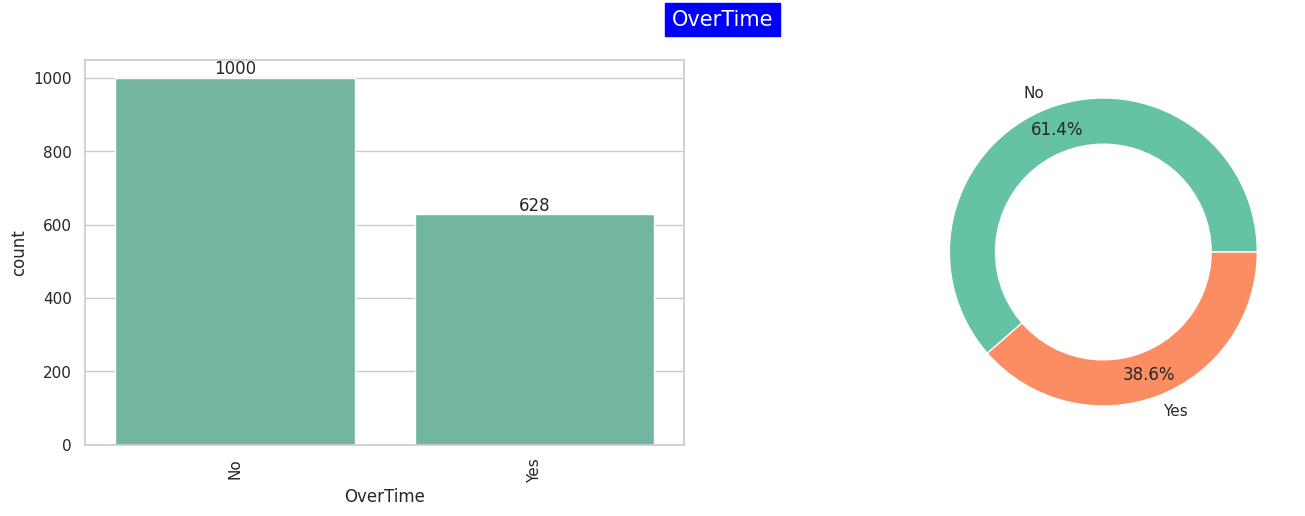

In [100]:
sns.set_style("whitegrid")
sns.set_palette("Set2")


for i, col in enumerate(cat):
    fig, axes = plt.subplots(1, 2, figsize=(17, 5))

    ax = sns.countplot(data=data, x=col, ax=axes[0])
    activities = [var for var in data[col].value_counts().sort_index().index]
    ax.set_xticklabels(activities, rotation=90)
    for container in axes[0].containers:
        axes[0].bar_label(container)

    index = data[col].value_counts().index
    size = data[col].value_counts().values
    explode = (0.05, 0.05)

    axes[1].pie(size, labels=index, autopct='%1.1f%%', pctdistance=0.85)

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)


    plt.suptitle(col, backgroundcolor='blue', color='white', fontsize=15)

    plt.show()

![](https://www.opexengine.com/wp-content/uploads/2020/01/Financial-Analysis.png)

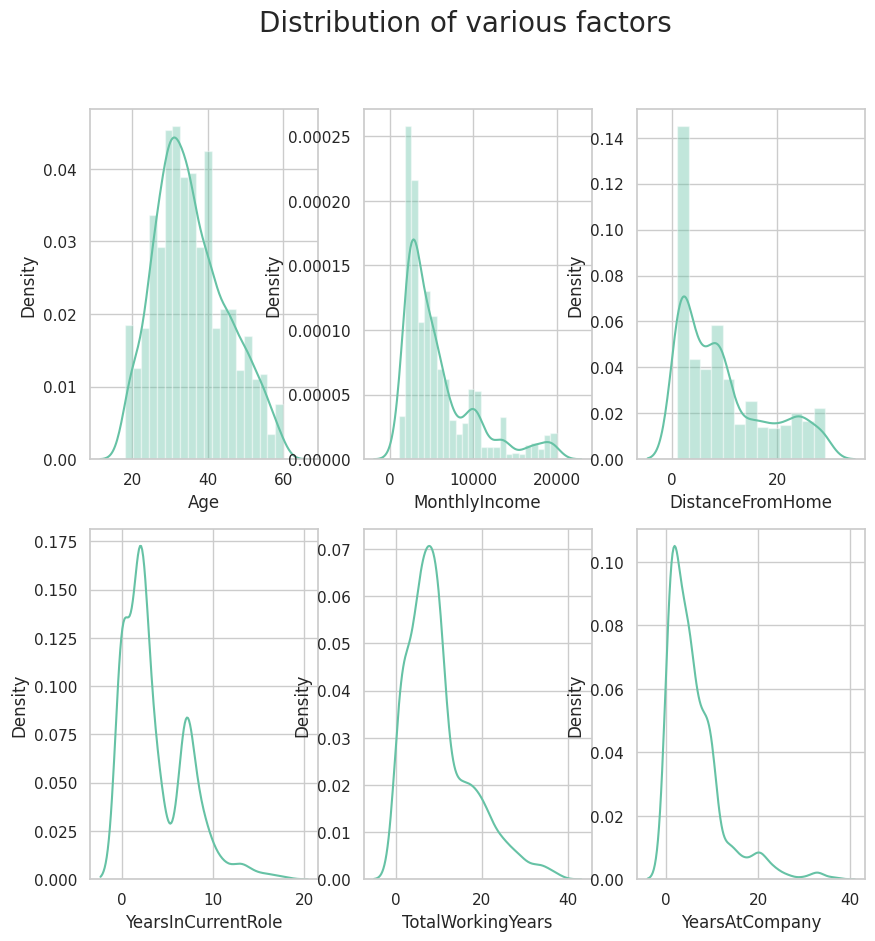

In [101]:
fig,ax = plt.subplots(2,3, figsize=(10,10))
plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(data['Age'], ax = ax[0,0])
sns.distplot(data['MonthlyIncome'], ax = ax[0,1])
sns.distplot(data['DistanceFromHome'], ax = ax[0,2])
sns.kdeplot(data['YearsInCurrentRole'], ax = ax[1,0])
sns.kdeplot(data['TotalWorkingYears'], ax = ax[1,1])
sns.kdeplot(data['YearsAtCompany'], ax = ax[1,2])
plt.show()

The bandwidth (bw) parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

# **How is attrition dependent on Age?**

In [102]:
attrition_counts = data['Attrition'].value_counts()

print("Attrition 0 count:", attrition_counts[0])
print("Attrition 1 count:", attrition_counts[1])

Attrition 0 count: 843
Attrition 1 count: 785


In [103]:
attrition_counts = data['Attrition'].value_counts().reset_index(name='Counts')

bar_fig = go.Figure(go.Bar(x=attrition_counts['index'], y=attrition_counts['Counts'], name='Bar Chart'))

pie_fig = px.pie(attrition_counts, values='Counts', names='index')

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "bar"}, {"type": "pie"}]])

fig.add_trace(bar_fig['data'][0], row=1, col=1)

fig.add_trace(pie_fig['data'][0], row=1, col=2)

fig.update_layout(
    title='Attrition Counts',
    xaxis_title='Attrition',
    yaxis_title='Counts',
    barmode='group'
)

fig.show()


In [104]:
plot_df = data.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.show()

Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

In [105]:
age_att = data.groupby(['Age', 'Attrition']).size().reset_index(name='Counts')

fig = px.line(age_att, x='Age', y='Counts', color='Attrition', title='Agewise Counts of People in an Organization')
fig.show()

# **Observation:**

As seen in the chart above, the attrition is maximum between the age groups 26-32. The attrition rate keeps on falling with increasing age, as people look after stability in their jobs at these point of times. Also at a very younger age, i.e. from 18-20, the chances of an employee leaving the organization is far more- since they are exploring at that point of time. It reaches a break even point at the age of 21.

# **Is income the main factor towards employee attrition?**

In [106]:
rate_att=data.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome']=round(rate_att['MonthlyIncome'],-3)
rate_att=rate_att.groupby(['MonthlyIncome','Attrition']).apply(lambda x:x['MonthlyIncome'].count()).reset_index(name='Counts')
fig=px.line(rate_att,x='MonthlyIncome',y='Counts',color='Attrition',title='Monthly Income basis counts of People in an Organization')
fig.show()

<Figure size 500x1000 with 0 Axes>

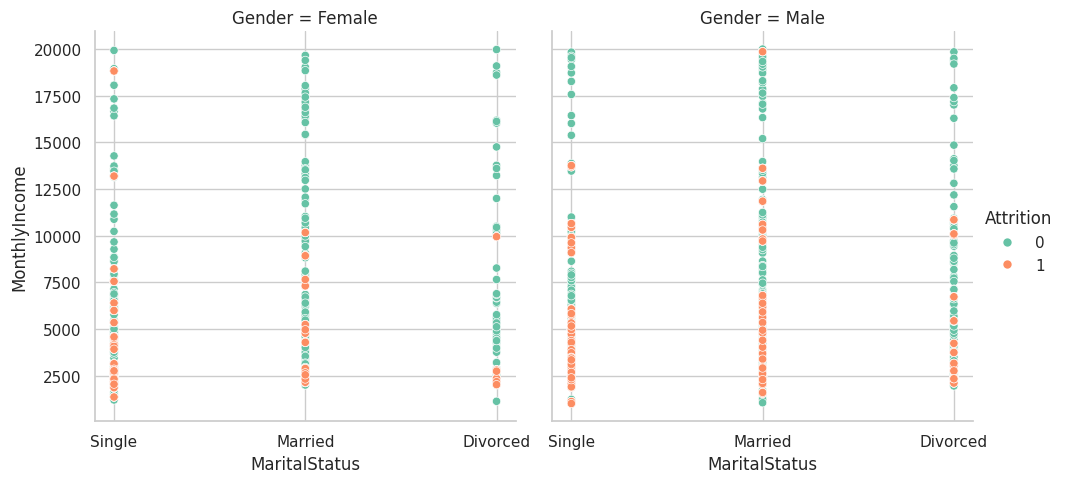

In [107]:
plt.figure(figsize=(5,10))
sns.relplot(data=data, y="MonthlyIncome", x="MaritalStatus", hue="Attrition",col='Gender')
plt.show()

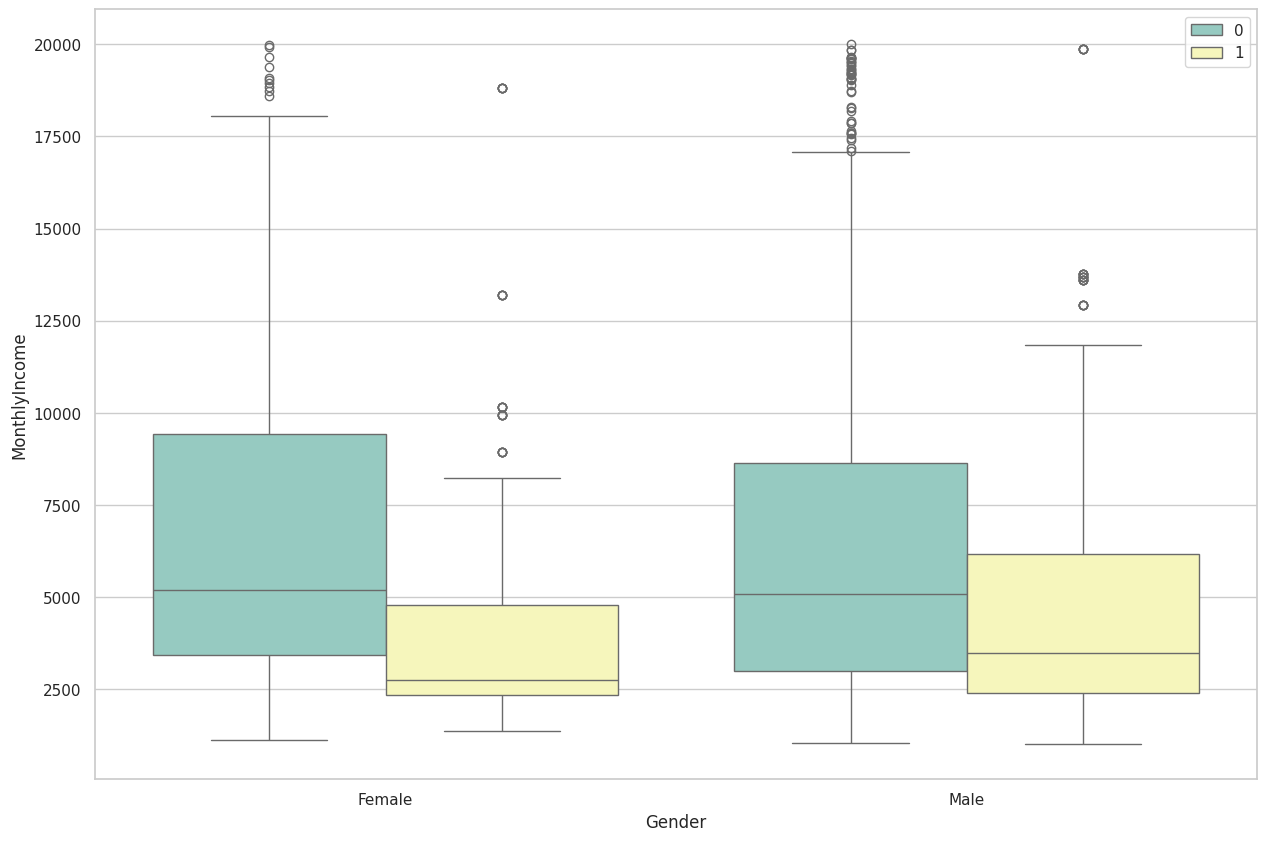

In [108]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x = 'Gender',y = 'MonthlyIncome',data=data, hue='Attrition',palette='Set3')
plt.legend(loc='best')
plt.show()

<Figure size 500x1000 with 0 Axes>

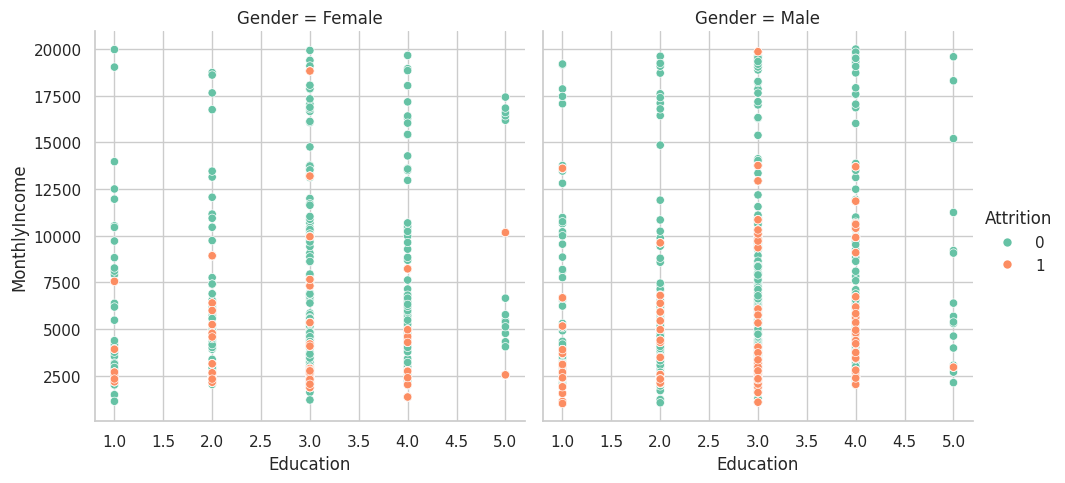

In [109]:
plt.figure(figsize=(5,10))
sns.relplot(data=data, y="MonthlyIncome", x="Education", hue="Attrition",col='Gender')
plt.show()

<Figure size 2000x2500 with 0 Axes>

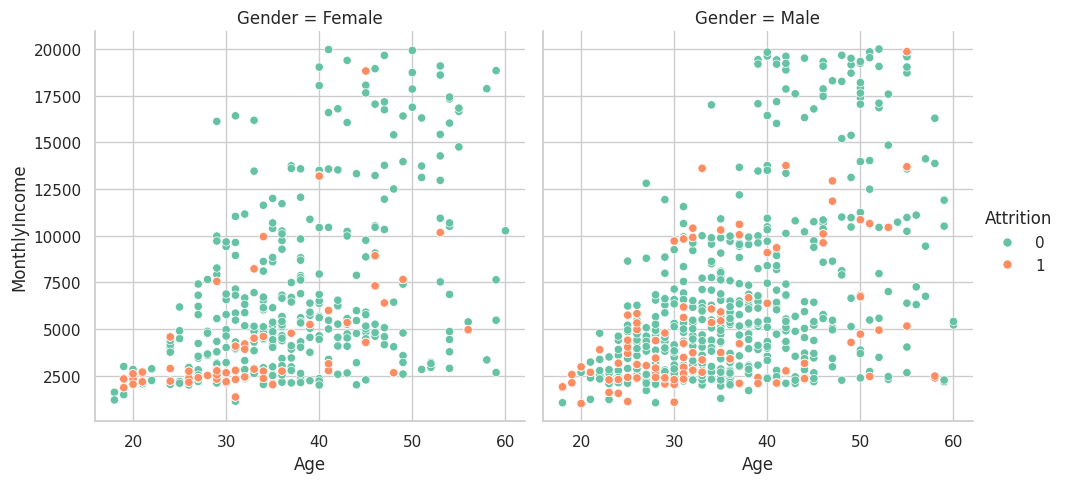

In [110]:
plt.figure(figsize=(20,25))
sns.relplot(data=data, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

# **Observation:**

As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly. This decreases further- but a minor spike is noticed aorund 10k- indicating the middle class liveliood. They tend to shift towards a better standard of living, and hence move to a different job. When the monthly income is pretty decent, the chances of an employee leaving the organization is low- as seen by the flat line



*   Attrition is the highest for both men and women from 18 to 35 years of age and gradually decreases.
*   As income increases, attrition decreases.
Attrition is much, much less in divorced women.
*   Attrition is higher for employees who usually travel than others, and this rate is higher for women than for men.
*   Attrition is the highest for those in level 1 jobs.
*   Women with the job position of manager, research director and technician laboratory have almost no attrition.
*   Men with the position of sales expert have a lot of attrition.










# **How Does the Department of work impact attrition?**

In [111]:
dept_att = data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0).reset_index()


fig = px.bar(dept_att,
             x='Department',
             y=[0, 1],
             title='Department-wise Counts of People in an Organization',
             labels={'Department': 'Department', 'value': 'Count', 'Attrition': 'Attrition'},
             color_discrete_map={0: 'blue', 1: 'red'}
             )

fig.show()

In [112]:
dept_att_counts = data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0).reset_index()

dept_total_counts = dept_att_counts.sum(axis=1)
dept_att_counts['Attrition_No_percent'] = (dept_att_counts[0] / dept_total_counts) * 100
dept_att_counts['Attrition_Yes_percent'] = (dept_att_counts[1] / dept_total_counts) * 100
print(dept_att_counts.to_string(index=False))

            Department   0   1  Attrition_No_percent  Attrition_Yes_percent
       Human Resources  36  45             44.444444              55.555556
Research & Development 564 415             57.609806              42.390194
                 Sales 243 325             42.781690              57.218310


# **Observations:**

This data comprises of only 3 major departments- among which Sales department has the highest attrition rates (57.2%), followed by the Human Resource Department (55.5%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(42.4%).

# **How does the environment satisfaction impact attrition?**

In [113]:
sats_att = data.groupby(['EnvironmentSatisfaction', 'Attrition']).size().unstack(fill_value=0)


sats_att = sats_att.reset_index()


fig = px.bar(sats_att,
             x='EnvironmentSatisfaction',
             y=[0, 1],
             title='Environment Satisfaction Level Counts of People in an Organization',
             labels={'EnvironmentSatisfaction': 'Environment Satisfaction Level', 'value': 'Count', 'Attrition': 'Attrition'},
             color_discrete_sequence=['blue','red'],
             barmode='stack'
            )


fig.show()


In [114]:
sats_att = data.groupby(['EnvironmentSatisfaction', 'Attrition']).size().reset_index(name='Counts')


fig = px.area(sats_att,
              x='EnvironmentSatisfaction',
              y='Counts',
              color='Attrition',
              title='Environment Satisfaction Level Counts of People in an Organization',
              labels={'EnvironmentSatisfaction': 'Environment Satisfaction Level', 'Counts': 'Count', 'Attrition': 'Attrition'},
              color_discrete_sequence=['#636EFA', '#EF553B']
             )

fig.show()

# **Observation:**

In the satisfaction Level 1-2, the chances of peope leaving the organization slightly decreases. This is indicative of the better hopes with which people stay in an organization. However, as we move from 2-3, people tend to move on to get better opportunities and experiences. The attrition rate is almost stagnant for the higher satisfaction levels.

# **How does self Job Satisfaction impact the Attrition?**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUvDbSe8M4DCfpCtdfMZtf9zJAQJD25WSHmA&usqp=CAU)

In [115]:
Jsats_att = data.groupby(['JobSatisfaction', 'Attrition']).size().unstack(fill_value=0)


Jsats_att = Jsats_att.reset_index()


fig = px.bar(Jsats_att,
             x='JobSatisfaction',
             y=[0, 1],
             title='Job Satisfaction Level Counts of People in an Organization',
             labels={'JobSatisfaction': 'Job Satisfaction Level', 'value': 'Count', 'Attrition': 'Attrition'},
             color_discrete_sequence=['#636EFA', '#EF553B'],
             barmode='stack'
            )


fig.show()


In [116]:
sats_att = data.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='Counts')


fig = px.area(sats_att,
              x='JobSatisfaction',
              y='Counts',
              color='Attrition',
              title='Job Satisfaction Level Counts of People in an Organization',
              labels={'JobSatisfaction': 'Job Satisfaction Level', 'Counts': 'Count', 'Attrition': 'Attrition'},
              color_discrete_sequence=['#636EFA', '#EF553B']
             )


fig.show()

# **Observation:**

With an increasing job satisfaction, the attrition rates decrease as can be seen in the chart above. Also from range 1-2 range we can infer (as seen above in Job Satisfaction), the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

# **Does company stocks for employees impact attrition?**

In [117]:
sats_att = data .groupby(['StockOptionLevel', 'Attrition']).size().unstack(fill_value=0)


sats_att = sats_att.reset_index()

fig = px.bar(sats_att,
             x='StockOptionLevel',
             y=[0, 1],
             title='Stock Facilities Level-wise People in an Organization',
             labels={'StockOptionLevel': 'Stock Option Level', 'value': 'Count', 'Attrition': 'Attrition'},
             color_discrete_sequence=['#636EFA', '#EF553B'],
             barmode='stack'
            )

fig.show()

# **Observation:**

The tendency of employees to leave the organization is much more when the stock availing options are limited. Since the stocks constitute to a huge amount of money while staying for a few years, people do not want to lose that opportunity. People with very limited/no stcok options have a freedom to leave the organization at will.

# **How does Communication Skill impact the overall attrition rates?**

In [118]:
Csats_att = data.groupby(['CommunicationSkill', 'Attrition']).size().unstack(fill_value=0)


Csats_att = Csats_att.reset_index()

fig = px.bar(Csats_att,
             x='CommunicationSkill',
             y=[0, 1],
             title='Communication skill level Counts of People in an Organization',
             labels={'CommunicationSkill': 'Communication skill level', 'value': 'Count', 'Attrition': 'Attrition'},
             color_discrete_sequence=['#636EFA', '#EF553B'],
             barmode='stack'
            )

fig.show()

# **How does work experience affect attrition?**

In [119]:
ncwrd_att = data.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')


fig = px.area(ncwrd_att,
              x='NumCompaniesWorked',
              y='Counts',
              color='Attrition',
              title='Work Experience Level Counts of People in an Organization',
              labels={'NumCompaniesWorked': 'Number of Companies Worked', 'Counts': 'Count', 'Attrition': 'Attrition'},
              color_discrete_sequence=['#636EFA', '#EF553B']
             )


fig.show()

# **Observations:**

As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

# **How does Work duration in current role impact Attrition?**

In [120]:
yrscr_att = data.groupby(['YearsInCurrentRole', 'Attrition']).size().reset_index(name='Counts')
fig = px.line(yrscr_att,
              x='YearsInCurrentRole',
              y='Counts',
              color='Attrition',
              title='Counts of People Working for Years in an Organization',
              labels={'YearsInCurrentRole': 'Years in Current Role', 'Counts': 'Count', 'Attrition': 'Attrition'}
             )

fig.show()

# **Observation:**

 We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

# **Does Hike percentage impact Attrition?**

In [121]:
hike_att = data.groupby(['PercentSalaryHike', 'Attrition']).size().reset_index(name='Counts')

fig = px.line(hike_att,
              x='PercentSalaryHike',
              y='Counts',
              color='Attrition',
              title='Count of Hike Percentages People Receive in an Organization',
              labels={'PercentSalaryHike': 'Percent Salary Hike', 'Counts': 'Count', 'Attrition': 'Attrition'}
             )


fig.show()

# **Observation:**

 Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

# **Are managers a reason of people resigning??**

In [122]:
man_att = data.groupby(['YearsWithCurrManager', 'Attrition']).size().reset_index(name='Counts')

fig = px.line(man_att,
              x='YearsWithCurrManager',
              y='Counts',
              color='Attrition',
              title='Count of People Spending Years with a Manager in an Organization',
              labels={'YearsWithCurrManager': 'Years with Current Manager', 'Counts': 'Count', 'Attrition': 'Attrition'}
             )

fig.show()

# **Observation:**

We notice 3 major spikes in the attrition rate, when we are analyzing the relationship of an employee with their manager. At the very start, where the time spent with the manager is relatively less- people tend to leave their jobs- considering their relationship with their previous managers. At an average span of 2 years, when employees feel they need an improvement, they also tend to go for a change.
When the time spent with the manager is slightly higher (about 7 years)- people tend to find their career progression stagnant, and tend to go for a change. But when the relative time spend with a manager is very high- people are satisfied with their work. Hence the chances of an employee resigning then is significantly low.

# **Conclusion of Analysis:**

We have checked the data, and have come upon to infer the following observations:
1. People are tending to switch to a different jobs at the start of their careers, or at the earlier parts of it. Once they have settled with a family or have found stability in their jobs, they tend to stay long in the same organization- only going for vertical movements in the same organization.
2. Salary and stock ptions have a great motivation on the employees and people tend to leave the organization much lesser. Higher pay and more stock options have seen more employees remain loyal to their company.
3. Work life balance is a great motivation factor for the employees. However, people with a good work-life balance, tend to switch in search of better opportunities and a better standard of living.
4. Departments where target meeting performance is very much crucial (for e.g. Sales) tend to have a greater chances of leaving the organization as compared to departments with more administration perspective (For e.g. Human Resources)
5. People with a good Job Satisfaction and Environment satisfaction are loyal to the organization- and this speaks loud for any Organization. However, people who are not much satisfied with their current project- tend to leave the organization far more.


# **PREDICTION MACHINE LEARNING MODEL**


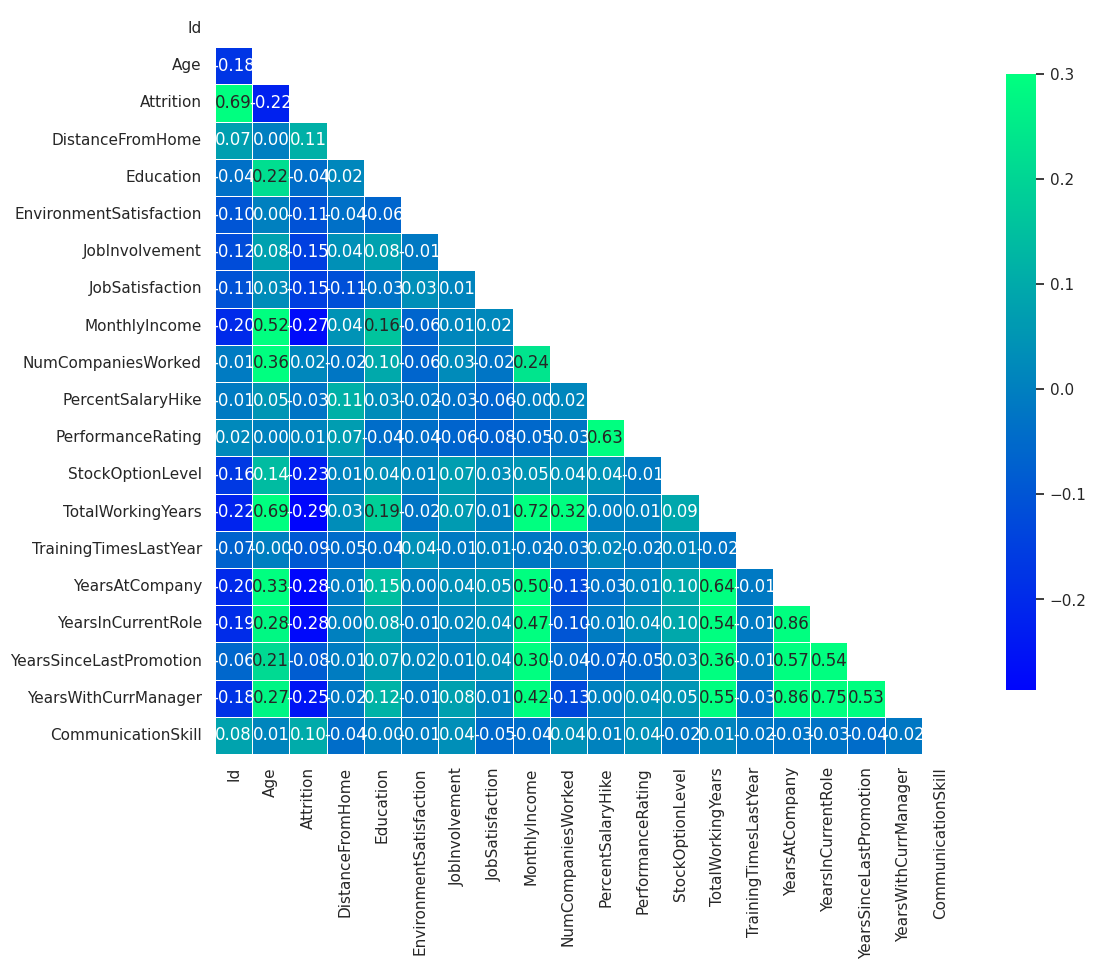

In [123]:
corr = data.corr(method = "spearman")
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap= "winter", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

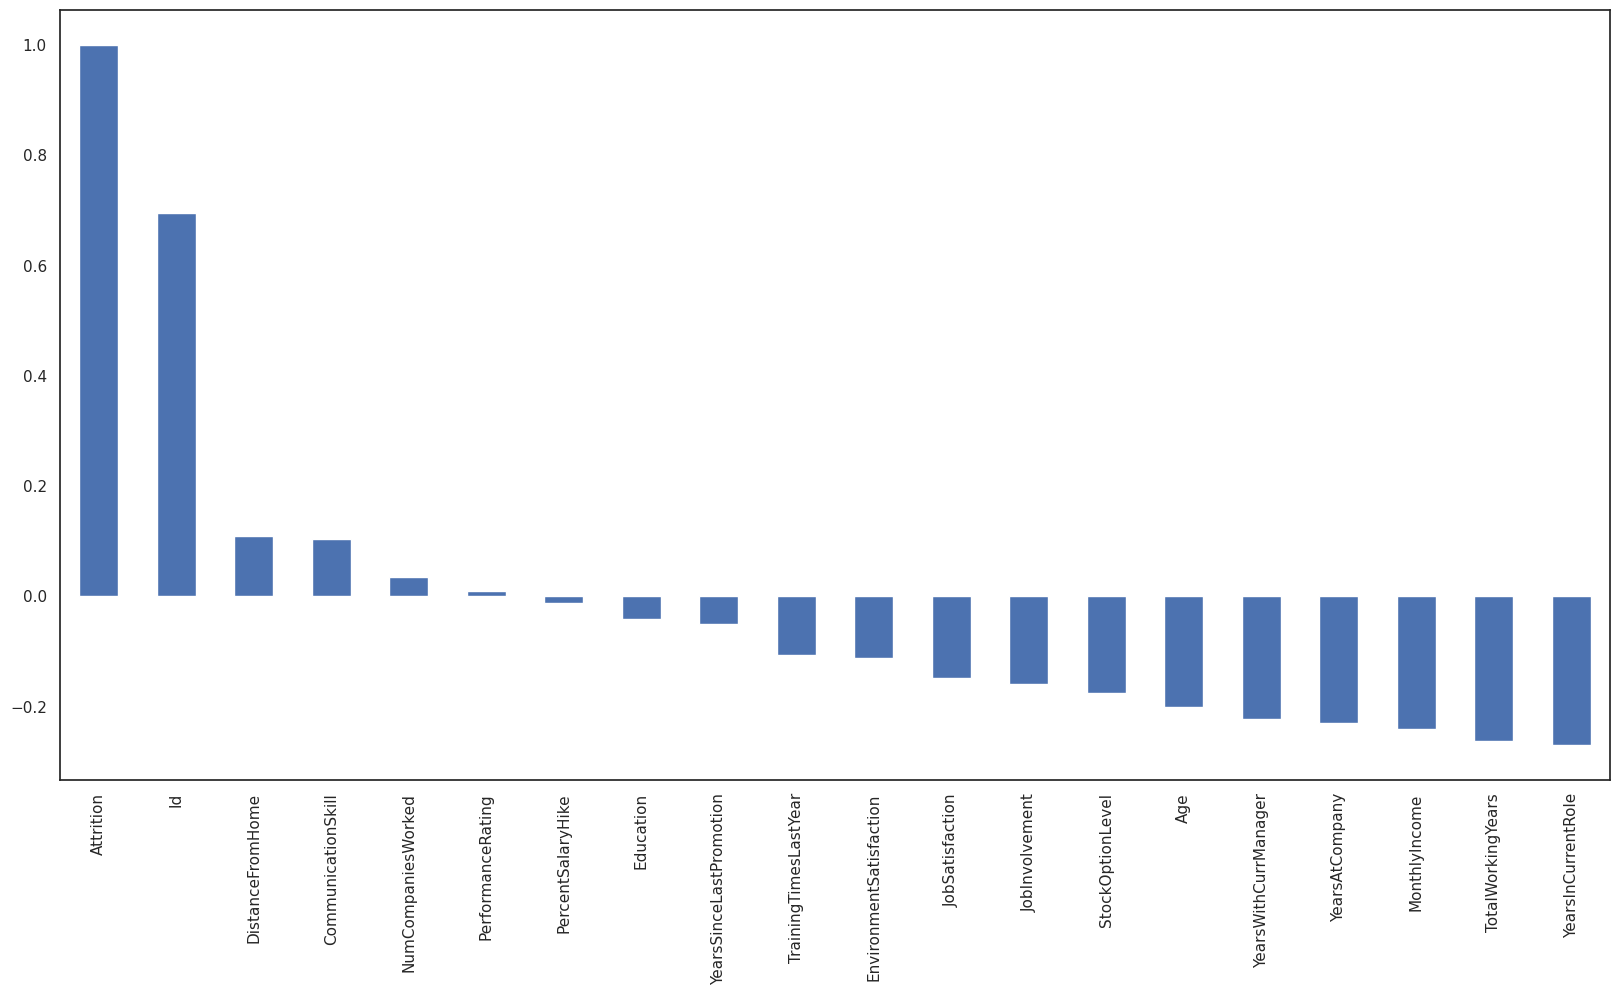

In [124]:
plt.figure(figsize=(20,10))
correlations=data.corr()
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

**OverTime**: The feature "OverTime" has the highest positive importance value, indicating that employees who work overtime are more likely to leave the company.

**MaritalStatus**: Employees who are single have a slightly higher likelihood of leaving compared to those who are married or divorced.

**Department**: Certain departments may have higher attrition rates compared to others.

**CommunicationSkill**: Higher communication skills may have a positive impact on employee retention.

**YearsSinceLastPromotion**: Employees who have not been promoted for a longer time are more likely to leave.

**EducationField**: The field of education of employees may also play a role in attrition.

**NumCompaniesWorked**: Employees who have worked at more companies before joining the current company are more likely to leave.

**Education**: Higher education levels may correlate with lower attrition rates.

**JobRole**: Certain job roles may have higher turnover rates than others.

**DistanceFromHome**: The distance of an employee's home from the workplace may influence their decision to leave.

**Gender**: Gender may also play a role in attrition rates, although the impact appears to be relatively small.

**YearsAtCompany**: Longer tenure at the company may indicate lower likelihood of leaving.

**TotalWorkingYears**: Total working experience may also influence attrition rates.

**MonthlyIncome**: Interestingly, monthly income doesn't seem to have a significant impact on attrition.

**Age**: Age of the employee also doesn't seem to have a significant impact on attrition.

**PercentSalaryHike**: The average annual salary hike doesn't appear to have a strong influence on attrition.

**YearsWithCurrManager**: Longer tenure with the current manager may indicate lower likelihood of leaving.

**BusinessTravel**: Frequency of business travel doesn't seem to have a strong influence on attrition.

**TrainingTimesLastYear**: Number of training sessions attended last year may influence attrition rates.

**YearsInCurrentRole**: Longer tenure in the current role may indicate lower likelihood of leaving.

**PerformanceRating**: Performance rating doesn't seem to have a strong influence on attrition.

**EnvironmentSatisfaction**: Lower environment satisfaction may correlate with higher attrition rates.

**JobSatisfaction**: Lower job satisfaction may also correlate with higher attrition rates.

**StockOptionLevel**: Employees with lower stock option levels are more likely to leave.

**JobInvolvement**: Lower job involvement may correlate with higher attrition rates.

# **Label Encoding**
What is Label Encoding?
Label encoding is a preprocessing technique used to convert categorical data into numerical format. It assigns a unique integer to each category in a categorical feature.

Why Label Encoding?
Machine learning algorithms typically work with numerical data, and most algorithms cannot directly handle categorical features in their raw form. Therefore, categorical features need to be converted into numerical format before feeding them into machine learning models.

In [125]:
data["BusinessTravel"] = LabelEncoder().fit_transform(data['BusinessTravel'])
data["Department"] = LabelEncoder().fit_transform(data['Department'])
data["EducationField"] = LabelEncoder().fit_transform(data['EducationField'])
data["Gender"] = LabelEncoder().fit_transform(data['Gender'])
data["JobRole"] = LabelEncoder().fit_transform(data['JobRole'])
data["MaritalStatus"] = LabelEncoder().fit_transform(data['MaritalStatus'])
data["OverTime"] = LabelEncoder().fit_transform(data['OverTime'])
# data1["BusinessTravel"] = LabelEncoder().fit_transform(data1['BusinessTravel'])
# data1["Department"] = LabelEncoder().fit_transform(data1['Department'])
# data1["EducationField"] = LabelEncoder().fit_transform(data1['EducationField'])
# data1["Gender"] = LabelEncoder().fit_transform(data1['Gender'])
# data1["JobRole"] = LabelEncoder().fit_transform(data1['JobRole'])
# data1["MaritalStatus"] = LabelEncoder().fit_transform(data1['MaritalStatus'])
# data1["OverTime"] = LabelEncoder().fit_transform(data1['OverTime'])

In [126]:
data
# data1

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,1,30,0,0,1,2,3,3,3,0,...,14,3,0,12,2,11,7,6,7,4
1,2,36,0,2,1,12,4,1,3,0,...,12,3,2,7,2,3,2,1,1,2
2,3,55,1,2,2,2,1,3,3,1,...,16,3,0,12,3,9,7,7,3,5
3,4,39,0,2,1,24,1,1,1,1,...,13,3,0,18,2,7,7,1,7,4
4,5,37,0,2,1,3,3,4,3,1,...,15,3,1,10,2,10,7,7,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1624,42,1,1,1,19,3,3,3,1,...,12,3,0,7,2,2,2,2,2,3
1624,1625,55,1,2,2,2,1,3,3,1,...,16,3,0,12,3,9,7,7,3,5
1625,1626,25,1,2,2,9,2,1,1,1,...,12,3,0,6,2,3,2,2,2,5
1626,1627,29,1,2,0,13,3,0,1,1,...,15,3,3,4,3,2,2,2,0,5


# **SMOTE – Oversampling**

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [127]:
cols = list(data.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(data[cols],data["Attrition"])

In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],
                                                 target,
                                                 test_size = 0.3,
                                                 shuffle=True)

In [129]:
print("Train Feature Size : ",len(X_train))
print("Train Label Size : ",len(Y_train))
print("Test Feature Size : ",len(X_test))
print("Test Label Size : ",len(Y_test))

Train Feature Size :  1180
Train Label Size :  1180
Test Feature Size :  506
Test Label Size :  506


# **LogisticRegression**

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set. A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

Train Accuracy : 88.22 %
Test Accuracy : 87.75 %
ROC AUC Score: 0.9467210552638159


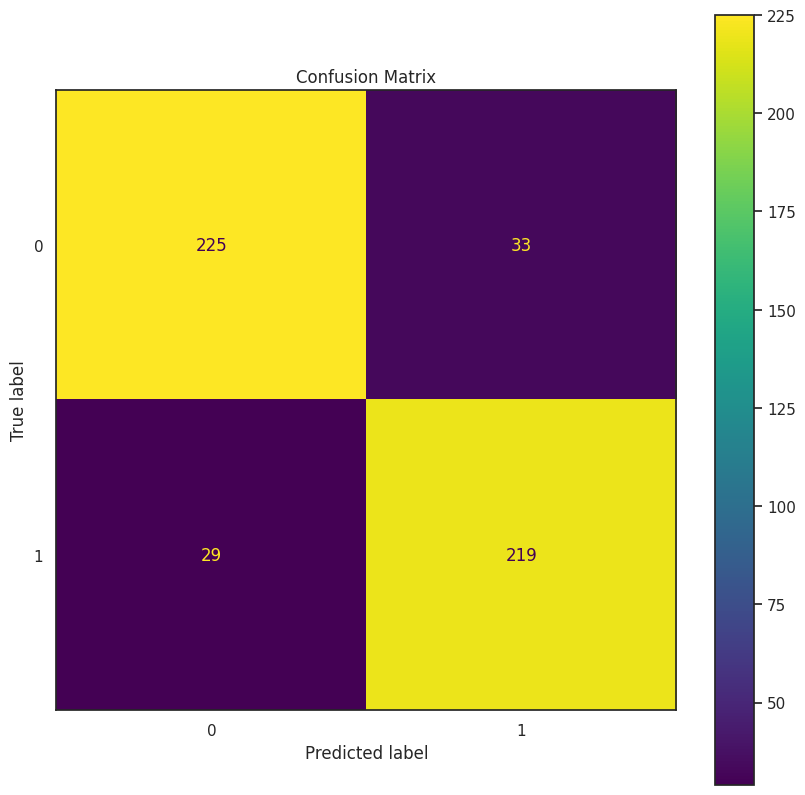

In [130]:
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)*100))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)*100))

cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
roc_auc = roc_auc_score(Y_test, logistic_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

# **Random Forests**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned Random decision forests correct for decision trees' habit of overfitting to their training set.Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees.However, data characteristics can affect their performance

Train Accuracy: 100.00 %
Test Accuracy: 93.48 %
ROC AUC Score: 0.9883349840431386


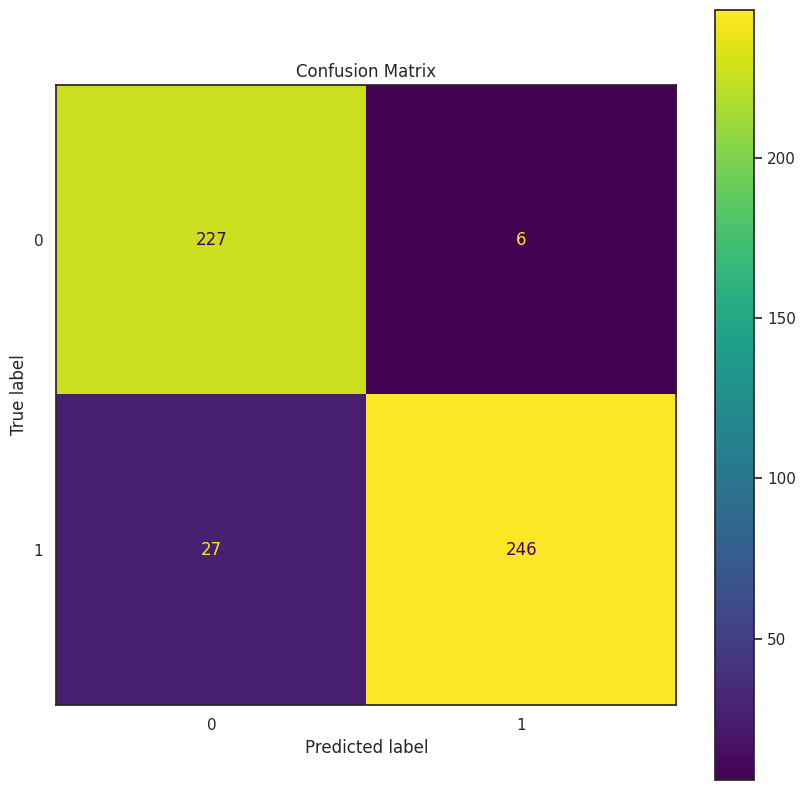

In [79]:
random_forest = RandomForestClassifier(n_estimators=590, random_state=0).fit(X_train, Y_train)

train_accuracy = accuracy_score(random_forest.predict(X_train), Y_train)
test_accuracy = accuracy_score(random_forest.predict(X_test), Y_test)
print("Train Accuracy: {:.2f} %".format(train_accuracy * 100))
print("Test Accuracy: {:.2f} %".format(test_accuracy * 100))


roc_auc = roc_auc_score(Y_test, random_forest.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc)


cm = confusion_matrix(Y_test, random_forest.predict(X_test))
classes = ["0", "1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

# **WE HAVE A ACCURACY OF 94%**